In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import librosa.display as lib_display
import numpy as np

In [24]:
emotion_path_csv = os.path.abspath("Emotion_path_mapped.csv")
df = pd.read_csv(emotion_path_csv,index_col=False).drop(["Unnamed: 0"],axis=1)
df.head(10)

,Emotion,Path
0,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
2,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
3,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
4,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
5,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
6,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
7,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
8,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
9,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...


C:\Users\PRITAM\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


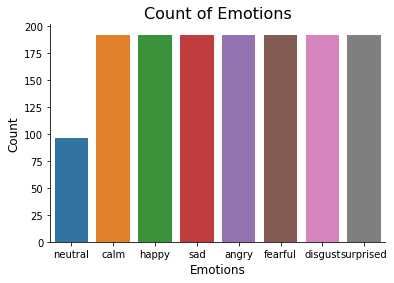

In [25]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Waveplot & Spectogram Function

---

In [26]:
def create_waveplot(data, samp_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    lib_display.waveshow(data, sr=samp_rate)
    plt.show()

def create_spectrogram(data, samp_rate, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    # print(f"X : {X}")
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3)) #12 inchs X 3 inchs 
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    lib_display.specshow(Xdb, sr=samp_rate, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    return Xdb

## Data Augmentation Function

---
> Adding

> - Noise

> - Stretch

> - Shift

> - Pitch

In [27]:

def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """
        data: Main Audio
        Rate: The rate in which the audio is being slowed or fast
        FROMULA/ Function  : librosa.effects.time_stretch(data, rate)
    """
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    """
        data: it takes only audio data as parameter
        returns np array of new audio
    """
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


# Example of Waveplot, Spectogram & Data Augmentation

---

In [28]:
import ipywidgets.widgets as wdg 
emos = df.Emotion.unique()
# print(emos)
emo_wdg = wdg.Dropdown(
    options=emos,
    value=emos[0],
    description='Emotion',
    disabled=False,
)

emo_wdg

Dropdown(description='Emotion', options=('neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'su…

03-01-01-01-01-01-02.wav


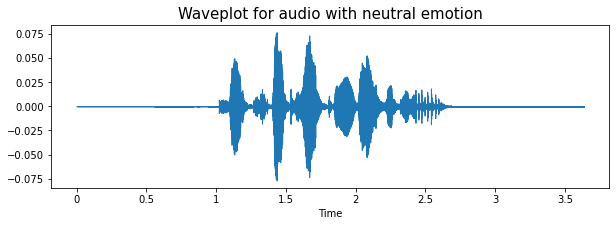

array([[-59.984093, -59.984093, -59.984093, ..., -59.984093, -59.984093,
        -59.984093],
       [-59.984093, -59.984093, -59.984093, ..., -55.04467 , -58.26988 ,
        -56.1796  ],
       [-59.984093, -59.984093, -59.984093, ..., -50.23609 , -59.984093,
        -57.734524],
       ...,
       [-59.984093, -59.984093, -59.984093, ..., -59.984093, -59.984093,
        -59.984093],
       [-59.984093, -59.984093, -59.984093, ..., -59.984093, -59.984093,
        -59.984093],
       [-59.984093, -59.984093, -59.984093, ..., -59.984093, -59.984093,
        -59.984093]], dtype=float32)

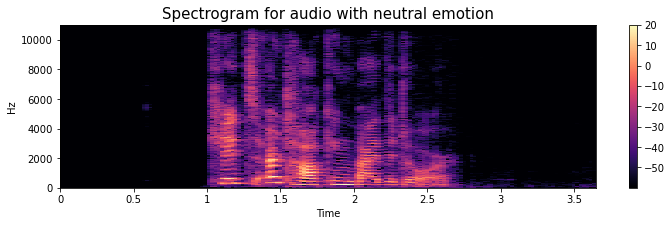

In [29]:
import numpy as np
import random as rnd

emotion=emo_wdg.value
path = rnd.choice(np.array(df.Path[df.Emotion==emotion]))
print(path.split("\\")[-1])
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
# ipd.Audio(path)


03-01-01-01-01-01-02.wav


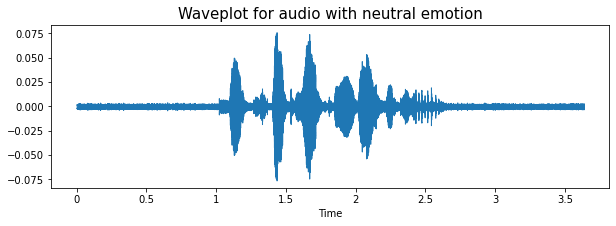

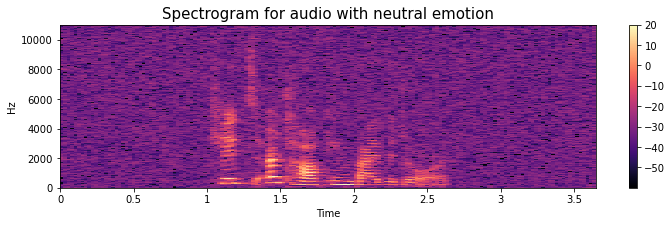

In [30]:
# taking any example and checking for techniques.
# path = np.array(df.Path)[1]
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

noise_added_data = noise(data)
create_waveplot(noise_added_data, sampling_rate, emotion)
noise_image = create_spectrogram(noise_added_data, sampling_rate, emotion)

03-01-01-01-01-01-02.wav


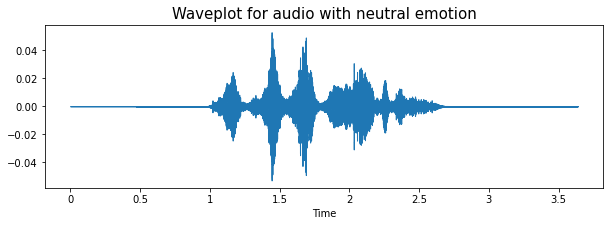

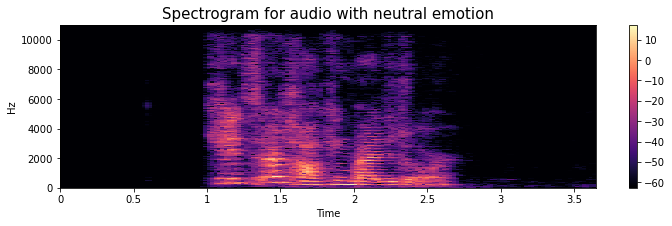

In [31]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

pitch_added_data = pitch(data,sample_rate,0.4)
create_waveplot(pitch_added_data, sampling_rate, emotion)
pitch_changed_audio = create_spectrogram(pitch_added_data, sampling_rate, emotion)

03-01-01-01-01-01-02.wav


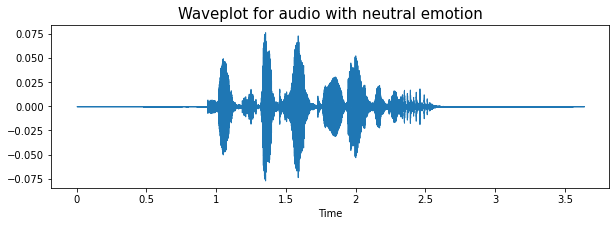

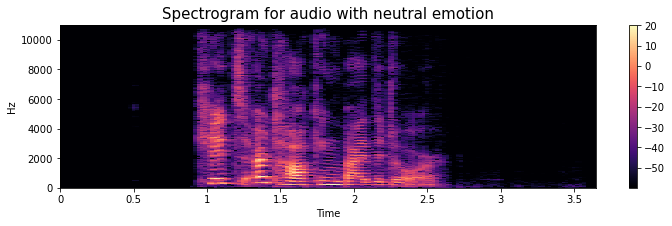

In [32]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

shift_added_data = shift(data)
create_waveplot(shift_added_data, sampling_rate, emotion)
shift_changed_audio = create_spectrogram(shift_added_data, sampling_rate, emotion)

03-01-01-01-01-01-02.wav


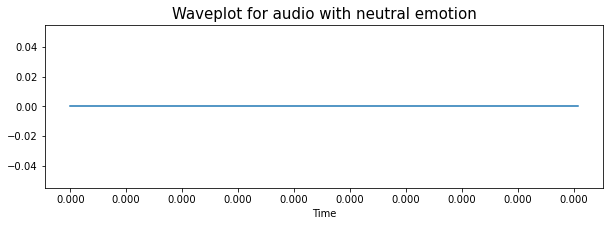

C:\Users\PRITAM\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=4
  warnings.warn(


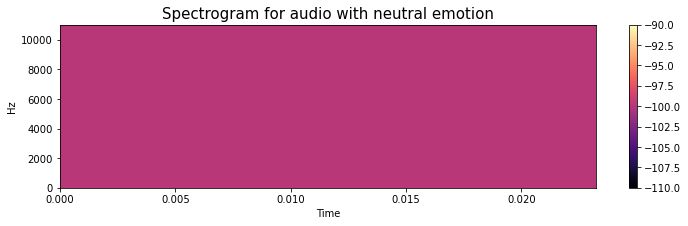

In [33]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

Stretched_data = stretch(data,sample_rate)
create_waveplot(Stretched_data, sampling_rate, emotion)
Stretched_audio = create_spectrogram(Stretched_data, sampling_rate, emotion)

<class 'numpy.ndarray'>


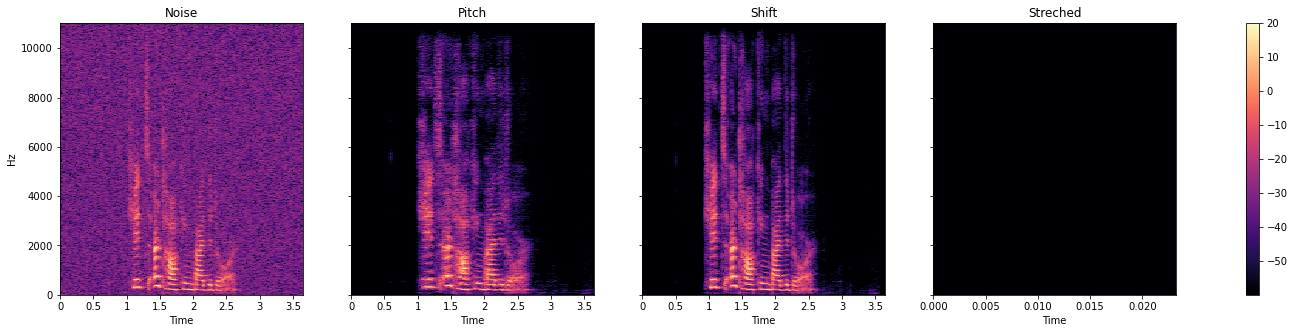

In [34]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=1 , ncols=4,sharey=True)
print(type(ax))

# On the first subplot, show the original spectrogram
audio_file_selected = path.split("\\")[-1]
plt.title(f"File - {audio_file_selected}  || Emotion - {emotion}")

img1 = lib_display.specshow(noise_image, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[0])
ax[0].set(title='Noise')

# On the second subplot, show the mel spectrogram
img2 = lib_display.specshow(pitch_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[1])
ax[1].set(title='Pitch')

# On the third subplot, show the chroma features
img3 = lib_display.specshow(shift_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[2])
ax[2].set(title='Shift')

img4 =  lib_display.specshow(Stretched_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[3])
ax[3].set(title='Streched')

fig.set_figheight(5)
fig.set_figwidth(25)

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1,ax=ax)
# fig.colorbar(img4,ax=[ax[1][0],ax[1][1]])


# [Link](https://librosa.org/doc/main/auto_examples/plot_display.html)


---

## Main Feature Extraction For All Audio

---

In [35]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    noise_data = noise(data)
    noise_stretch_data = stretch(noise_data)
    data_stretch_pitch = pitch(noise_stretch_data, sample_rate)
    res1 = extract_features(data_stretch_pitch)
    result = np.array(res1)
    
    return result

In [36]:
get_features(path)

array([ 2.46636285e-01,  6.03416370e-01,  6.20592702e-01,  6.50665980e-01,
        6.56302744e-01,  6.71083188e-01,  5.86083991e-01,  6.21328714e-01,
        6.60010207e-01,  7.27152631e-01,  6.85583099e-01,  6.54598398e-01,
        6.68293209e-01, -5.34599229e+02,  4.66194303e+01, -1.32083781e+01,
        2.47852753e+00, -1.25791860e+01, -6.15462080e+00, -1.37197502e+01,
       -1.03541130e+01, -9.78674159e+00,  9.88101139e-01, -8.14917900e+00,
       -2.64761594e+00, -7.04126653e+00, -1.14235949e+00, -1.15472390e+01,
       -3.17269567e-02, -5.48643346e+00,  1.37621755e+00, -1.61998620e+00,
        5.62902160e+00,  2.37708966e-03,  8.19140552e-06,  2.69042771e-05,
        1.89334988e-05,  1.91478618e-05,  1.47037574e-05,  7.86214347e-05,
        2.18573972e-03,  1.14364401e-02,  1.66468520e-02,  8.55739214e-03,
        1.46881104e-03,  4.92621049e-03,  4.66501542e-03,  4.48692037e-03,
        2.55975050e-02,  2.65454941e-02,  5.12001842e-03,  4.17251740e-03,
        2.73958203e-03,  

In [37]:
df.columns[0]

'Emotion'

In [38]:
from ipywidgets import IntProgress
from IPython.display import display

no_of_aud = 1440

f = IntProgress(value=0,\
                min=0,\
                max=no_of_aud, 
                bar_style='success',\
                description='Extracting Features:',\
                orientation='horizontal'\
                ) # instantiate the bar


In [39]:
c = 0
display(f)
Features,Labels = [],[]
for emo,aud_path in zip(df.Emotion,df.Path):
    aud_features = get_features(aud_path) #162 features per 3 audio [org, stretch, pitch]
    # for ele in aud_features:
    Features.append(aud_features)
    Labels.append(emo)
    c += 1 
    f.value = c  
    

IntProgress(value=0, bar_style='success', description='Extracting Features:', max=1440)

In [40]:
len(Features),len(Labels)

(1440, 1440)

In [41]:
Extracted_Features_DF = pd.DataFrame(Features)
Extracted_Features_DF['labels'] = Labels
Extracted_Features_DF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.279514,0.703756,0.736823,0.806092,0.782010,0.713422,0.656320,0.633494,0.670024,0.731536,...,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000001,5.983615e-08,neutral
1,0.287760,0.748217,0.821957,0.812205,0.735090,0.664197,0.637912,0.617599,0.715936,0.740380,...,0.000014,0.000017,0.000017,0.000017,0.000019,0.000018,0.000014,0.000005,3.123728e-07,neutral
2,0.277091,0.781108,0.860907,0.803445,0.767308,0.686528,0.623064,0.616170,0.673181,0.728865,...,0.000004,0.000004,0.000005,0.000005,0.000006,0.000008,0.000008,0.000003,1.024004e-07,neutral
3,0.326421,0.772341,0.855526,0.841515,0.820705,0.762666,0.705555,0.690831,0.707719,0.751362,...,0.000039,0.000042,0.000041,0.000044,0.000047,0.000047,0.000038,0.000013,8.357285e-07,neutral
4,0.266605,0.715337,0.689897,0.732931,0.766625,0.682774,0.639234,0.659342,0.619035,0.682333,...,0.000005,0.000005,0.000005,0.000006,0.000007,0.000006,0.000005,0.000002,9.829482e-08,calm


In [42]:
Extracted_Features_DF.to_csv('features_NORG.csv', index=False)

In [43]:
feature_file= os.path.abspath('features_NORG.csv')
feature_df = pd.read_csv(feature_file,index_col=False)

In [44]:
feature_df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.279514,0.703756,0.736823,0.806092,0.782010,0.713422,0.656320,0.633494,0.670024,0.731536,...,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000001,5.983615e-08,neutral
1,0.287760,0.748217,0.821957,0.812205,0.735090,0.664197,0.637912,0.617599,0.715936,0.740380,...,0.000014,0.000017,0.000017,0.000017,0.000019,0.000018,0.000014,0.000005,3.123728e-07,neutral
2,0.277091,0.781108,0.860907,0.803445,0.767308,0.686528,0.623064,0.616170,0.673181,0.728865,...,0.000004,0.000004,0.000005,0.000005,0.000006,0.000008,0.000008,0.000003,1.024004e-07,neutral
3,0.326421,0.772341,0.855526,0.841515,0.820705,0.762666,0.705555,0.690831,0.707719,0.751362,...,0.000039,0.000042,0.000041,0.000044,0.000047,0.000047,0.000038,0.000013,8.357285e-07,neutral
